<a href="https://colab.research.google.com/github/Devmalya19/Mini-Project/blob/main/catsVdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-04-27 13:49:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   125MB/s    in 0.5s    

2021-04-27 13:49:40 (125 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.259.jpg', 'cat.98.jpg', 'cat.926.jpg', 'cat.762.jpg', 'cat.76.jpg', 'cat.832.jpg', 'cat.890.jpg', 'cat.562.jpg', 'cat.597.jpg', 'cat.967.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
import numpy as np
a = np.array([[1,2,3,4,5],
             [4,5,6,7,8]])
a.ndim

2

In [ ]:
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

In [ ]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/cats_and_dogs_filtered/train'
CATEGORIES = ['cats','dogs']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
    

In [ ]:
flat_data[0]

array([0.15294118, 0.17084967, 0.15686275, ..., 0.17686275, 0.13091503,
       0.0975817 ])

In [ ]:
target

array([0, 0, 0, ..., 1, 1, 1])

<BarContainer object of 2 artists>

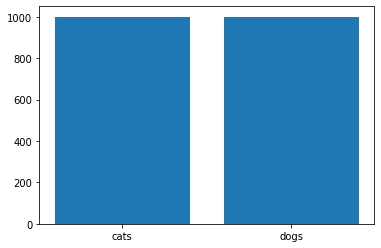

In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('catsVdogs: Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image: ", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Image Uploaded')

  if st.button('PREDICT'):
    CATEGORIES = ['cats','dogs']
    st.write('RESULT')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')



In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url